In [23]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 

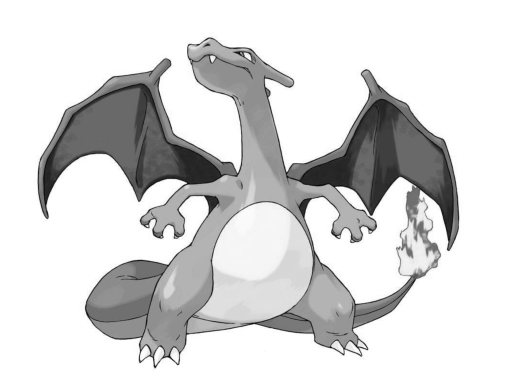

In [24]:
image = cv2.imread('image.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

In [25]:
def gaussian_kernel(size, sigma):
    k = size // 2 
    x, y = np.meshgrid(np.linspace(-k, k, size), np.linspace(-k, k, size))
    kernel = (1 / (2 * np.pi * sigma**2)) * np.exp(-(x**2 + y**2) / (2 * sigma**2))
    kernel /= np.sum(kernel)
    return kernel

In [26]:
def apply_mask(image, mask):
    filtered_image = np.zeros_like(image)
    mask_height, mask_width = mask.shape
    height, width = image.shape
    k = mask_height // 2
    for i in range(k, height - k):
        for j in range(k, width - k):
            region = image[i-k:i+k+1, j-k:j+k+1]
            value = np.sum(region * mask)
            filtered_image[i, j] = np.clip(value, 0, 255)
    return filtered_image

In [35]:
gaussian_filter_1 = gaussian_kernel(7, 1)
gaussian_filter_2 = gaussian_kernel(7, 3)

In [36]:
new_image_1 = apply_mask(image, gaussian_filter_1)
new_image_2 = apply_mask(image, gaussian_filter_2)

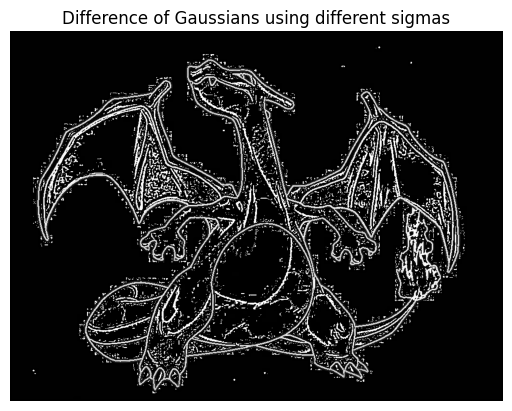

In [37]:
difference_of_gaussians = new_image_1 - new_image_2
plt.imshow(difference_of_gaussians, cmap="gray")
plt.axis("off")
plt.title("Difference of Gaussians using different sigmas")
plt.show()

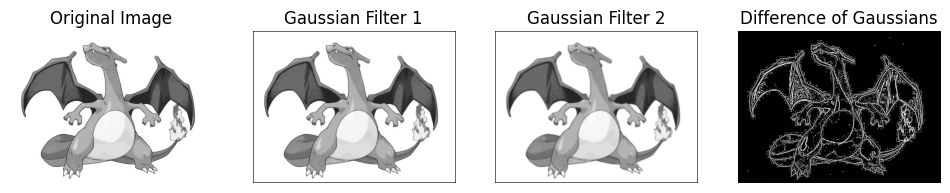

In [38]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.title("Original Image")

plt.subplot(1, 4, 2)
plt.imshow(new_image_1, cmap="gray")
plt.axis("off")
plt.title("Gaussian Filter 1")

plt.subplot(1, 4, 3)
plt.imshow(new_image_2, cmap="gray")
plt.axis("off")
plt.title("Gaussian Filter 2")

plt.subplot(1, 4, 4)
plt.imshow(difference_of_gaussians, cmap="gray")
plt.axis("off")
plt.title("Difference of Gaussians")

plt.show()

In [50]:
gaussian_filter_3 = gaussian_kernel(5, 3)
gaussian_filter_4 = gaussian_kernel(3, 3)

In [51]:
new_image_3 = apply_mask(image, gaussian_filter_3)
new_image_4 = apply_mask(image, gaussian_filter_4)

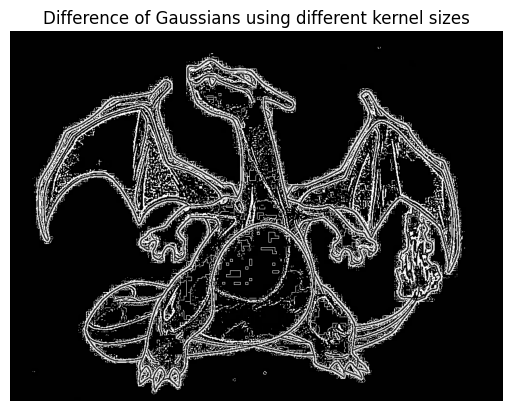

In [52]:
difference_of_gaussians_2 = new_image_3 - new_image_4
plt.imshow(difference_of_gaussians_2, cmap="gray")
plt.axis("off")
plt.title("Difference of Gaussians using different kernel sizes")
plt.show()

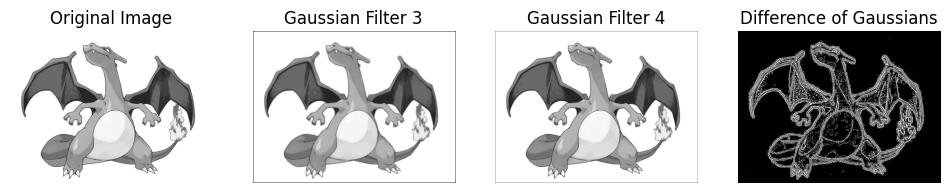

In [53]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.title("Original Image")

plt.subplot(1, 4, 2)
plt.imshow(new_image_3, cmap="gray")
plt.axis("off")
plt.title("Gaussian Filter 3")

plt.subplot(1, 4, 3)
plt.imshow(new_image_4, cmap="gray")
plt.axis("off")
plt.title("Gaussian Filter 4")

plt.subplot(1, 4, 4)
plt.imshow(difference_of_gaussians_2, cmap="gray")
plt.axis("off")
plt.title("Difference of Gaussians")

plt.show()

In [54]:
def threshold(image, value):
    return np.where(image > value, 255, 0)

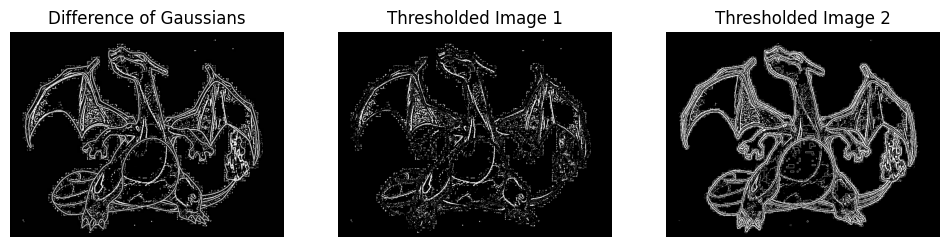

In [69]:
thresholded_image_1 = threshold(difference_of_gaussians, 250)
thresholded_image_2 = threshold(difference_of_gaussians_2, 200)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(difference_of_gaussians, cmap="gray")
plt.axis("off")
plt.title("Difference of Gaussians")

plt.subplot(1, 3, 2)
plt.imshow(thresholded_image_1, cmap="gray")
plt.axis("off")
plt.title("Thresholded Image 1")

plt.subplot(1, 3, 3)
plt.imshow(thresholded_image_2, cmap="gray")
plt.axis("off")
plt.title("Thresholded Image 2")

plt.show()

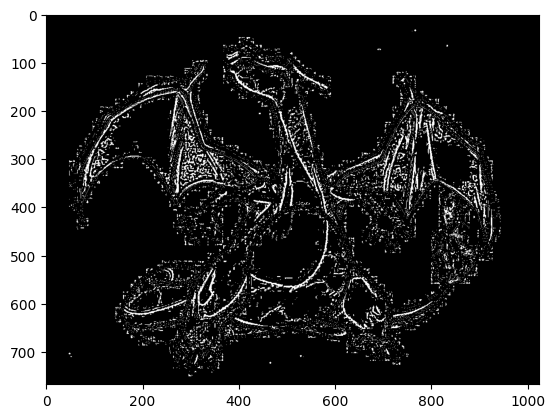

In [70]:
plt.imshow(thresholded_image_1, cmap="gray")

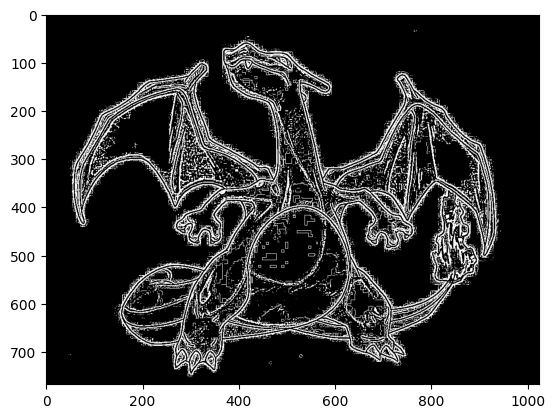